In [1]:
#Cargamos las librerias a utilizar.

%matplotlib inline
import pandas as pd # Trabajo de Dataframes
import seaborn as sns # Trabajo con plots estadisticos
import numpy as np # Trabajo con matrices
import matplotlib.pyplot as plt # Plots mas simples


In [2]:
# Ojo la carpeta donde se guarda.
df = pd.read_csv('train.csv', index_col=['id'], parse_dates=['fecha'], error_bad_lines=False)

In [3]:
#Una manera prolija de ver rapidamente las columnas y un ejemplo de los datos en ellas.
df.head().transpose()

id,254099,53461,247984,209067,185997
titulo,depto. tipo a-402,condominio horizontal en venta,casa en venta urbi 3 recamaras tonala,casa sola en toluca zinacantepec con credito i...,paseos del sol
descripcion,"depto. interior de 80.15m2, consta de sala com...","<p>entre sonora y guerrero, atr&aacute;s del h...",descripcion \nla mejor ubicacion residencial e...,casa en privada con caseta de vigilancia casas...,bonito departamento en excelentes condiciones ...
tipodepropiedad,Apartamento,Casa en condominio,Casa,Casa,Apartamento
direccion,Avenida Division del Norte 2005,AV. MEXICO,Urbi Tonala,IGNACIO MANUEL ALTAMIRANO 128,PASEOS DEL SOL
ciudad,Benito Juárez,La Magdalena Contreras,Tonalá,Zinacantepec,Zapopan
provincia,Distrito Federal,Distrito Federal,Jalisco,Edo. de México,Jalisco
antiguedad,NaN,10,5,1,10
habitaciones,2,3,3,2,2
garages,1,2,2,1,1
banos,2,2,2,1,1


In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
precio,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06
ciudad,372,0.16


In [6]:
df.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio                               float64
dtype: obj

In [7]:
df.get_dtype_counts()

float64           15
datetime64[ns]     1
object             6
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [9]:
# Memory Usage
(df.memory_usage() / (1024 * 1024)).sum()

42.1142578125

In [10]:
# Como castear un tipo
df.piscina.astype(int).dtypes

dtype('int32')

In [11]:
# here are all the attributes of both a pandas Series and a pandas DF
s_attr_methods = set(dir(pd.Series))
df_attr_methods = set(dir(pd.DataFrame))
len(s_attr_methods & df_attr_methods) #they share 400 methods

399

In [12]:
ciudad=df.ciudad
ciudad.value_counts().head()

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
Name: ciudad, dtype: int64

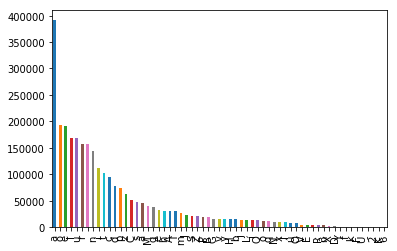

In [13]:
pd.Series(list(df.ciudad.str.cat())).value_counts().plot(kind="bar")

In [14]:
# Bring only columns with a certain type
df.select_dtypes('number')

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,
254099,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,0.00,0.00,0.00,1.00,1.00,650000.00
185997,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,0.00,0.00,0.00,0.00,0.00,1150000.00
126147,5.00,2.00,1.00,1.00,75.00,90.00,23650.00,19.30,-99.15,0.00,0.00,0.00,0.00,1.00,1100000.00
139233,nan,3.00,1.00,2.00,140.00,160.00,73510.00,17.14,-96.80,0.00,0.00,0.00,0.00,0.00,1150000.00
5013,2.00,4.00,2.00,3.00,293.00,293.00,130510.00,20.67,-87.04,0.00,0.00,0.00,0.00,0.00,4200000.00
44962,1.00,2.00,1.00,1.00,58.00,nan,9010.00,nan,nan,0.00,0.00,0.00,1.00,1.00,310000.00


In [15]:
# DF tiene un indice (matriz), Serie tiene un indice (vector), la lista no.

counts_ciudad = df.ciudad.value_counts().tolist()
print(counts_ciudad)

[12646, 11014, 10360, 7925, 7162, 6946, 6633, 6614, 6554, 5795, 5783, 5721, 5718, 5293, 4636, 4006, 3805, 3779, 3775, 3757, 3588, 3408, 3254, 3141, 3093, 3020, 2863, 2590, 2454, 2159, 2048, 2026, 2018, 1996, 1972, 1905, 1887, 1865, 1845, 1470, 1457, 1452, 1429, 1386, 1370, 1360, 1342, 1294, 1292, 1285, 1249, 1245, 1207, 1066, 1055, 1046, 1029, 1029, 1000, 952, 931, 871, 861, 857, 832, 800, 793, 773, 759, 747, 728, 725, 665, 651, 627, 620, 617, 578, 574, 565, 553, 548, 523, 521, 520, 513, 485, 460, 459, 449, 444, 420, 418, 384, 378, 369, 351, 340, 329, 307, 293, 289, 287, 285, 279, 278, 267, 267, 264, 262, 246, 242, 240, 236, 235, 231, 229, 221, 211, 208, 195, 190, 177, 161, 154, 150, 147, 146, 146, 144, 133, 130, 130, 129, 126, 126, 124, 121, 120, 116, 111, 111, 110, 106, 102, 101, 91, 86, 85, 83, 83, 78, 77, 75, 75, 74, 74, 73, 70, 69, 68, 68, 67, 67, 65, 65, 61, 60, 56, 56, 56, 55, 54, 54, 54, 50, 50, 49, 48, 48, 47, 47, 47, 46, 45, 44, 43, 40, 40, 39, 39, 39, 38, 38, 36, 36, 35, 35,

In [16]:
#REVISAR
counts_ciudad.to_frame().head()

AttributeError: 'list' object has no attribute 'to_frame'

In [17]:
df.isnull().any()

titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool

In [18]:
df.isnull().sum()

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [19]:
df.isnull().mean().sort_values()

precio                       0.00
escuelascercanas             0.00
piscina                      0.00
usosmultiples                0.00
gimnasio                     0.00
fecha                        0.00
centroscomercialescercanos   0.00
tipodepropiedad              0.00
provincia                    0.00
ciudad                       0.00
descripcion                  0.01
titulo                       0.02
metroscubiertos              0.07
habitaciones                 0.09
banos                        0.11
idzona                       0.12
garages                      0.16
antiguedad                   0.18
metrostotales                0.21
direccion                    0.22
lat                          0.51
lng                          0.51
dtype: float64

In [20]:
df.describe(include='all')

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,234613,238381,239954,186928,239628,239845,196445.00,217529.00,202235.00,213779.00,222600.00,188533.00,211379.00,116512.00,116512.00,240000,240000.00,240000.00,240000.00,240000.00,240000.00,240000.00
unique,186191,232187,24,140269,875,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,1830,nan,nan,nan,nan,nan,nan
top,casa en venta,empresa dedicada a los ante notario y regist...,Casa,-,Querétaro,Distrito Federal,nan,nan,nan,nan,nan,nan,nan,nan,nan,2016-12-03 00:00:00,nan,nan,nan,nan,nan,nan
freq,468,119,141717,660,12646,58790,nan,nan,nan,nan,nan,nan,nan,nan,nan,1416,nan,nan,nan,nan,nan,nan
first,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,2012-01-01 00:00:00,nan,nan,nan,nan,nan,nan
last,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,2016-12-31 00:00:00,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.12,2.90,1.55,2.13,174.02,176.77,2423467.82,20.70,-99.51,NaN,0.06,0.06,0.09,0.44,0.40,2530838.35
std,NaN,NaN,NaN,NaN,NaN,NaN,9.55,0.90,0.85,0.91,98.15,94.43,10567938.36,3.14,9.74,NaN,0.24,0.23,0.28,0.50,0.49,2152551.80
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,NaN,0.00,0.00,0.00,0.00,0.00,310000.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.00,1.00,1.00,90.00,102.00,24890.00,19.36,-100.98,NaN,0.00,0.00,0.00,0.00,0.00,952772.50


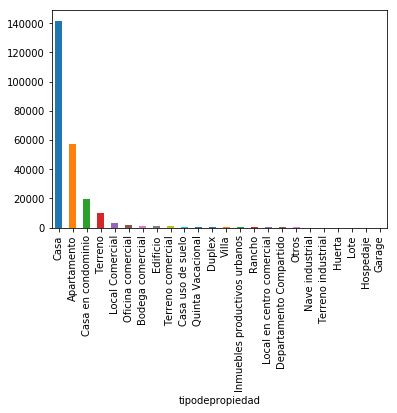

In [21]:
df.groupby(by=['tipodepropiedad']).size().sort_values(ascending=False).plot(kind="bar")

In [22]:
df.index.values.sum()

35992651702

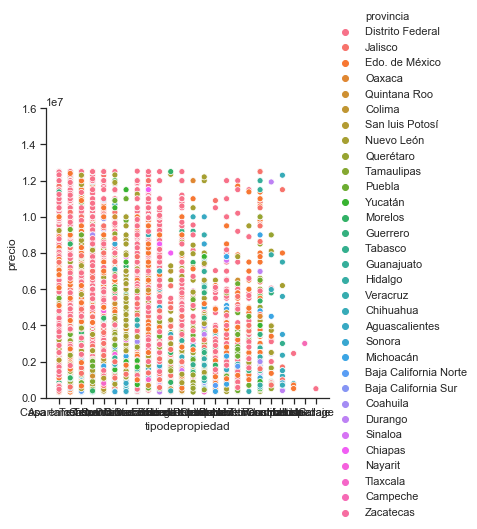

In [25]:
corr_tipoprop_precio = df[['precio', 'tipodepropiedad', 'provincia']]
sns.set(style="darkgrid")
sns.set(style="ticks", color_codes=True)
g = sns.relplot(x='tipodepropiedad', y='precio', data=corr_tipoprop_precio, hue='provincia')
g.set(ylim=(0, 16000000))